# PART A

## STATISTICS

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
age = pd.Series(np.array([57 ,61 ,57, 57, 58 ,57 ,61, 54, 68,
51 ,49 ,64 ,50, 48 ,65, 52, 56, 46,
54 ,49 ,50, 47 ,55, 55, 54, 42 ,51,
56 ,55 ,54 ,51 ,60 ,62, 43, 55, 56,
61 ,52 ,69 ,64 ,46, 54]))

#### Q1. Compute the mean, median and the mode of the data

In [4]:
mean=age.mean()
print('mean:',mean)

mean: 54.904761904761905


In [5]:
median=age.median()
print('Median:',median)

Median: 55.0


In [6]:
mode=age.mode()
print('Mode:',mode)

Mode: 0    54
dtype: int32


#### Q2 Compute the range , variance and standard deviation of CEO ages

In [7]:
print('Range =', max(age)-min(age))
print('Variance = ', age.var(ddof=1))
print('Standard Deviation=',age.std(ddof=1))

Range = 27
Variance =  39.4541231126597
Standard Deviation= 6.2812517154353635


#### Q3. Find the mean deviation for the data . The mean deviation is defined asbelow.

In [8]:
meandev=0
for i in age:
    meandev = meandev+abs(i - age.mean())
meandev=meandev/len(age)
print('Mean Deviation=',meandev)

Mean Deviation= 4.814058956916099


#### Q4. Calculate the Pearson coefficient of skewness and comment on theskewness of  the data


In [9]:
for i in age:
    skew=3*(mean-median)/age.std()
print('Pearson coefficient of skewness is',skew)

Pearson coefficient of skewness is -0.04548683903435661


Inference:
We can say that the data is almost normal 

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [61]:
stats.norm.sf(-2)-stats.norm.sf(2)

0.9544997361036416

In [10]:
stats.norm.cdf(2)-stats.norm.cdf(-2)

0.9544997361036416

We can infer that 95.4% of the values fall within 2 standard deviations

In [11]:
0.954*len(age)

40.068

In [12]:
#The number of values are 
print(0.954*len(age),'values fall in between 2 std')

40.068 values fall in between 2 std


According to chebyshev's theorem

In [13]:
n = 2**2
z = 1/n
x = 1-z
x

0.75

In [60]:
0.75*len(age)

31.5

According to chebyshev's theorem 39 values fall in between 2 std in the given data

#### Q6. Find the three quartiles and the interquartile range (IQR).

In [16]:
q1 = age.quantile(0.25)
q2=age.quantile(0.5)
q3=age.quantile(0.75)
iqr = q3-q1
print('Q1=',q1)
print('Q3=',q3)
print('Q2=',q2)
print('IQR=',iqr)

Q1= 51.0
Q3= 57.75
Q2= 55.0
IQR= 6.75


#### Q7 Are there any outliers in the data set ?

In [17]:
outliers = age[(age<(q1-1.5*iqr))|(age>(q3+1.5*iqr))]
outliers

8     68
38    69
dtype: int32

Inference:
Yes there are 2 outliers present

#### Q8.Draw a boxplot of the dataset to confirm .

<AxesSubplot:>

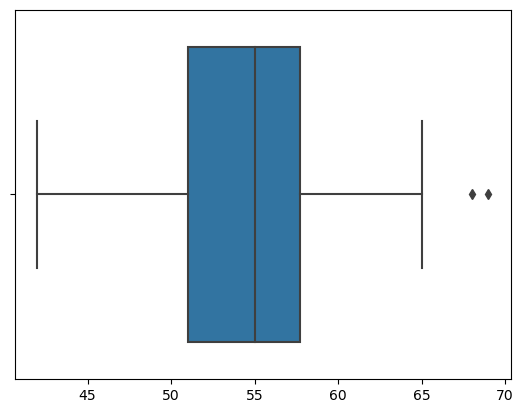

In [18]:
sns.boxplot(age)

#### Q9. Find the percentile rank of the datapoint 50.

In [19]:
print('Percentile rank of datapoint 50 is:',np.percentile(age,50))

Percentile rank of datapoint 50 is: 55.0


In [20]:
df=pd.DataFrame(age,columns=['age'])

In [21]:
df['age'].rank(pct = True)

0     0.702381
1     0.833333
2     0.702381
3     0.702381
4     0.761905
5     0.702381
6     0.833333
7     0.428571
8     0.976190
9     0.285714
10    0.178571
11    0.916667
12    0.226190
13    0.142857
14    0.952381
15    0.345238
16    0.619048
17    0.083333
18    0.428571
19    0.178571
20    0.226190
21    0.119048
22    0.535714
23    0.535714
24    0.428571
25    0.023810
26    0.285714
27    0.619048
28    0.535714
29    0.428571
30    0.285714
31    0.785714
32    0.880952
33    0.047619
34    0.535714
35    0.619048
36    0.833333
37    0.345238
38    1.000000
39    0.916667
40    0.083333
41    0.428571
Name: age, dtype: float64

In [22]:
df['raml']=df['age'].rank(pct=True)

In [23]:
df[df['age']==55]

,age,raml
22,55,0.535714
23,55,0.535714
28,55,0.535714
34,55,0.535714


#### Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [24]:
stats.norm.cdf(50,loc=age.mean(),scale=age.std(ddof=1))

0.21744318383652284

#### Q11. Create a frequency distribution for the data and visualize it appropriately

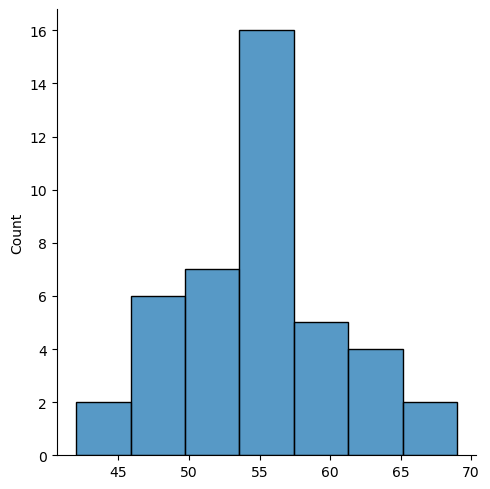

In [25]:
sns.displot(age)
#plt.xticks(rotation=90)
plt.show()

Q12. Create a probability distribution of the data and visualize it appropriately.

<AxesSubplot:ylabel='Count'>

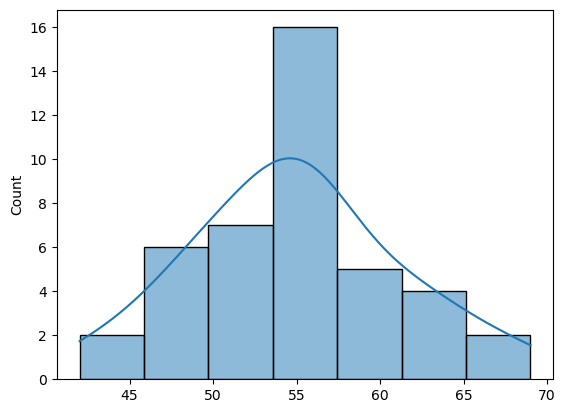

In [26]:
sns.histplot(age,kde=True)

Inference:
We  can see that the curve is normally distributed

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [27]:
import random

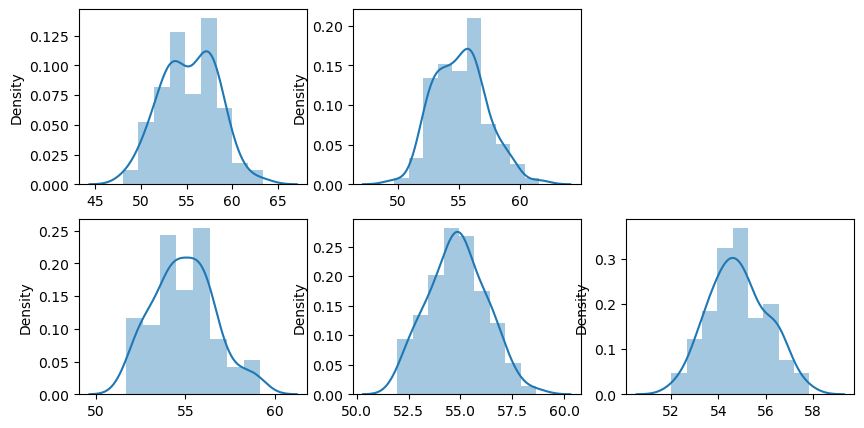

In [28]:
mean5=[]
mean10=[]
mean15=[]
mean20=[]
mean25=[]

for i in range(0,100):
    sample = random.choices(population=age,k=5)
    sample = np.array(sample)
    mean5.append(sample.mean()) 
    
for i in range(0,100):
    sample = random.choices(population=age,k=10)
    sample = np.array(sample)
    mean10.append(sample.mean()) 
for i in range(0,100):
    sample = random.choices(population=age,k=15)
    sample = np.array(sample)
    mean15.append(sample.mean()) 
for i in range(0,100):
    sample = random.choices(population=age,k=20)
    sample = np.array(sample)
    mean20.append(sample.mean()) 
for i in range(0,100):
    sample = random.choices(population=age,k=25)
    sample = np.array(sample)
    mean25.append(sample.mean()) 
                    
plt.figure(figsize=(10,5))

plt.subplot(2,3,1)    
sns.distplot(mean5)
plt.subplot(2,3,2)    
sns.distplot(mean10)  
plt.subplot(2,3,4)    
sns.distplot(mean15) 
plt.subplot(2,3,5)    
sns.distplot(mean20) 
plt.subplot(2,3,6)    
sns.distplot(mean25) 
plt.show()

Inference:
We can see that the distributions are also normal
This supports CLT

Q14. Treat this dataset as a binomial distribution where p is the probability that a 
person becomes a CEO above 50 years age. What is the probability that out of a 
random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years 
of age?

In [29]:
stats.binom.sf(k=6,n=10,p=0.6)

0.3822806015999999

#### Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.

In [30]:
n=300
k=75
p=len(age[age>60])
p1=p/len(age)
stats.binom.sf(k=k,n=n,p=p1)

0.05939137052597083

#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( Statereasons as to why did you use a z or t distribution)

In [31]:
alf = 0.05
alphaby2 = alf/2

xbar = age.mean()
sigma = age.std(ddof=1)
n = 40
z =stats.norm.isf(alphaby2)

CIU = xbar + z*sigma/np.sqrt(n)
CIL= xbar - z*sigma/np.sqrt(n)
print('95% confidence interval for the true mean age of the population of CEOs are:',CIL,CIU)

95% confidence interval for the true mean age of the population of CEOs are: 52.95821759982123 56.85130620970258


In [32]:
len(age)

42

As we have 42 observations we use z distribution

#### Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs of Fortune 500 companies are above 60 years in the population. Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find theminimum sample size necessary.

In [33]:
c = 0.95
a = 1-c
aby2 = a/2
p = 0.25
q = 1-p
n = 42
zalphaby2 = stats.norm.isf(aby2)
CIU = p + zalphaby2*np.sqrt(p*q/n)
CIL = p - zalphaby2*np.sqrt(p*q/n)
CIL,CIU

(0.11904439784705034, 0.38095560215294966)

stderror = z alpha * sqrt(pq/n)
n=pq*(zalpha/stderror)^2

In [34]:
stderror = 0.02
n = p*q*(zalphaby2/0.02)
print('Minimum sample size to calculate with 2% accuracy is ',n)

Minimum sample size to calculate with 2% accuracy is  18.374662355063005


#### Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [35]:
c = 0.90
a = 1-c
aby2 = a/2
p=0.25
q=1-p
zaby2 = stats.norm.isf(aby2)
n = p*q*(zaby2/0.05)
print('Minimum sample size to calculate with 5% accuracy is ',n)

Minimum sample size to calculate with 5% accuracy is  6.168201101068022


#### Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 years.

In [36]:
#STEP 1
#ho = Mu_age <=60 
#ha = Mu_age > 60


In [37]:
#step 2
#t_critical value

t_critic = stats.t.isf(0.05,df=29)
t_critic

1.6991270265334977

In [38]:
#step 3
#t_score
t = (10/30)/np.sqrt(0.25*0.75/30)
t

4.2163702135578385

In [39]:
#step 4
#t_value
stats.t.sf(t,df=29)

0.00011083898937365939

In [40]:
#step 4 
#t_value method
#since t_value is > t_critical , null hypothesis is rejected
# Therefore his claim is not rejected

#### Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:

In [41]:
UK=pd.Series([47 ,49 ,73 ,50 ,65 ,70 ,49 ,47 ,40, 43,
46 ,35 ,38 ,40 ,47 ,39 ,49, 37 ,37, 36,
40 ,37 ,31 ,48 ,48 ,45 ,52, 38 ,38 ,36,
44 ,40 ,48 ,45 ,45 ,36 ,39 ,44 ,52 ,47])

USA = pd.Series([47 ,57, 52, 47, 48, 56, 56, 52, 50, 40,
46, 43, 44 ,51 ,36, 42, 49, 49, 40, 43,
39 ,39 ,22, 41 ,45,46 ,39 ,32 ,36,32,
32 ,32, 37 ,33 ,44 ,49, 44 ,44 ,49 ,32])

In [42]:
a=[47,49 ,73, 50 ,65,70,49, 47, 40, 43,46, 35, 38, 40, 47, 39, 49, 37, 37, 36,40, 37, 31, 48, 48, 45, 52, 38, 38, 36,44, 40, 48, 45, 45, 36, 39, 44, 52, 47]
b=[47, 57, 52, 47, 48, 56, 56, 52, 50, 40,46, 43, 44, 51, 36, 42, 49, 49, 40, 43,39, 39, 22, 41, 45, 46, 39, 32, 36, 32,32, 32, 37, 33, 44, 49, 44, 44, 49, 32]
n1=len(a)
n2=len(b)
s1=8.8
s2=7.8
alpha=0.05
print('alpha:',alpha)
xbar1=np.mean(a)
xbar2=np.mean(b)

#stating the hypothesis:
#ho:mu1<=mu2
#h1:mu1>mu2

#Decision criteria
#right tail test
zalpha=stats.norm.isf(alpha)
print('zalpha:',zalpha)
n=(xbar1-xbar2)-0  #mu1-mu2=0
d=np.sqrt((s1**2/n1)+(s2**2/n2))
z=d/n
print('z:',z)

### Step 4 : Critical value method
# Since zalpha >z , the sample does not fall in rejection zone
# We do reject Ho

### Step 5 : pvalue
p=stats.norm.sf(z)
print('pvalue',p)

# Since pvalue > alpha , we do not reject Ho

### Step 6 : Communication of decision
#the CEO ages of UK are on average are not older than the CEO ages of Americans.

alpha: 0.05
zalpha: 1.6448536269514729
z: 0.9916271700818027
pvalue 0.16068971514558755



##### a. What are your hypotheses?


Ho:mu_UK <= mu_USA 

mu_UK - mu_USA <= 0

Ho:mu_UK > mu_USA 

Ha:mu_UK - Mu_USA > 0


##### b. What significance level will you use?

significance level at 5%

##### c. What statistical test will you use?

will use a Large sample test for 2 samples

##### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [43]:
#z critical value
zalpha=stats.norm.isf(alpha)
print('zalpha:',zalpha)

zalpha: 1.6448536269514729


In [44]:
# z score
n=(xbar1-xbar2)-0  #mu1-mu2=0
d=np.sqrt((s1**2/n1)+(s2**2/n2))
z=d/n
print('z:',z)

z: 0.9916271700818027


Since zalpha >z , the sample does not fall in rejection zone We do not reject Ho.

In [45]:
#pvalue method
stats.norm.sf(z)

0.16068971514558755

##### e. What is your decision?

Null hypothesis is not rejected

##### f. What can you conclude?

We conclude that the average age of UK CEO <= average age of USA CEO

###### g. Do you feel that using the data given really answers the original
question asked?


We can not assume blindly , but our findings stand true for the given data

##### h. What other data might be used to answer the question?

maybe a data with more people may help us answer this question better

# PART B #

## CREDIT CARD FRAUD DETECTION

In [46]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [47]:
df.shape

(284807, 31)

In [48]:
# Missing Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 4. Check the datatype, number of non-null values and name of each variablein the dataset.

In [49]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### 5. Check if there are any non-real characters in the dataset.

given data is in numerical type..no categorical data present.

#### 6. Check the descriptive statistics of the dataset.

In [50]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 7. Check the number of fraudulent transactions in the dataset and visualizeusing pie chart and bar plot.

In [51]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [52]:
frauds.shape

(492, 31)

In [53]:
normal.shape

(284315, 31)

In [54]:
X = df.Class.value_counts()
X

0    284315
1       492
Name: Class, dtype: int64

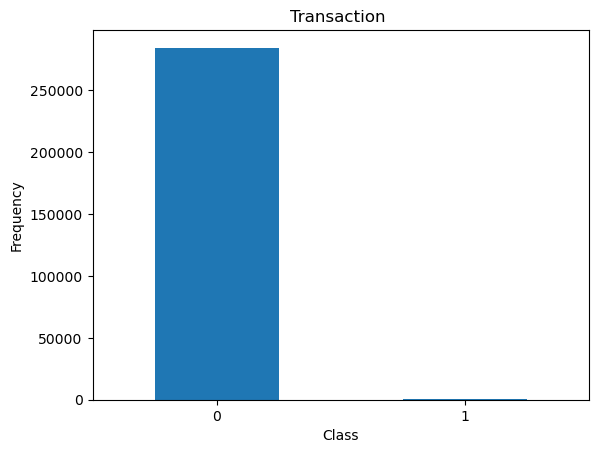

In [55]:
# COUNT PLOT
count_class = pd.value_counts(df['Class'], sort = True)
count_class.plot(kind = 'bar',rot =0)
plt.title("Transaction ")
plt.xlabel("Class")
plt.ylabel("Frequency");

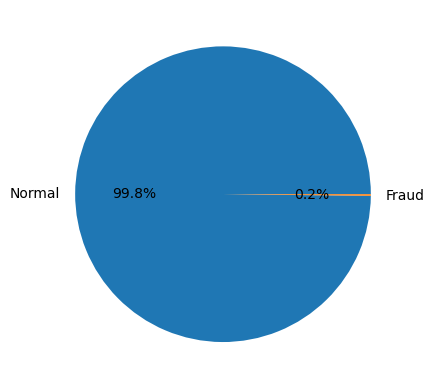

In [56]:
# PIE CHART
plt.pie(X, autopct = '%.1f%%',labels=['Normal','Fraud'])
plt.show()

#### 8. Check the maximum and minimum fraudulent amount.

In [57]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Min = 0
Max = 2125.87

#### 9. Check the number of transactions where the transaction amount is zeroand consider as a fraud transaction.

In [58]:
df.loc[((df.Amount == 0) & (df.Class == 1))]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.0,1
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.0,1


#### 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

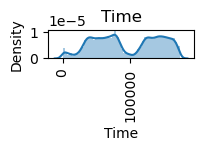

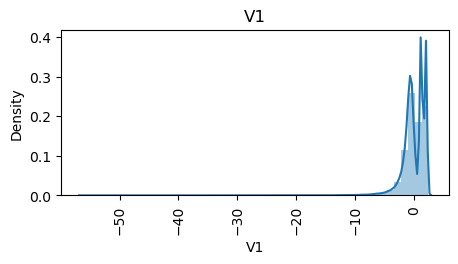

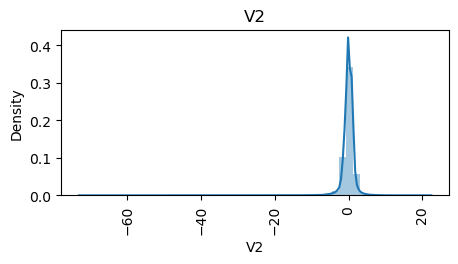

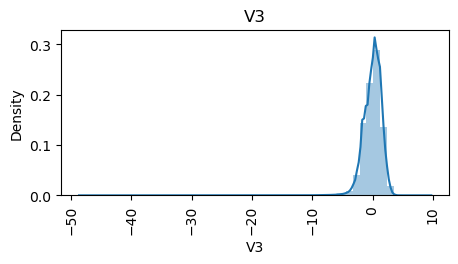

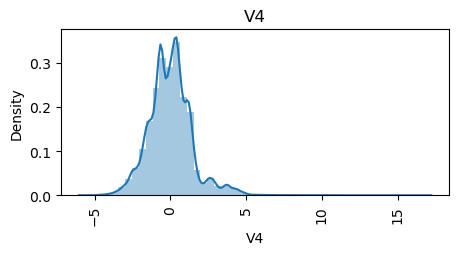

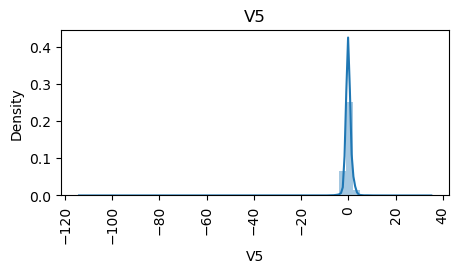

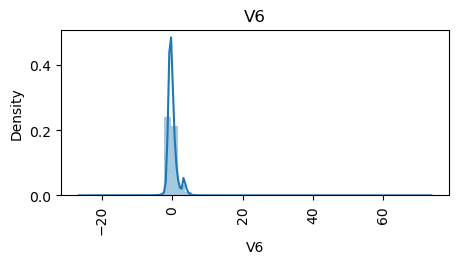

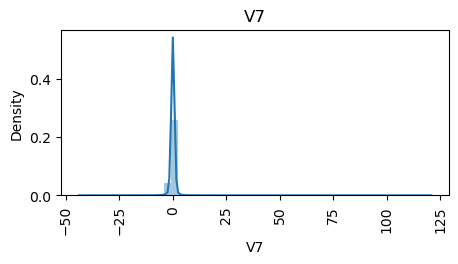

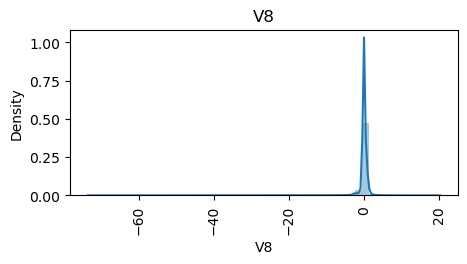

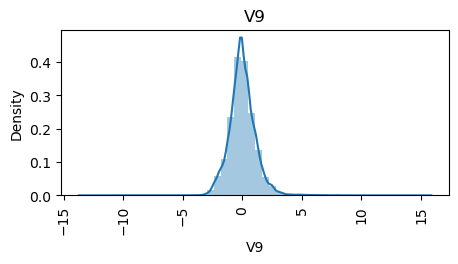

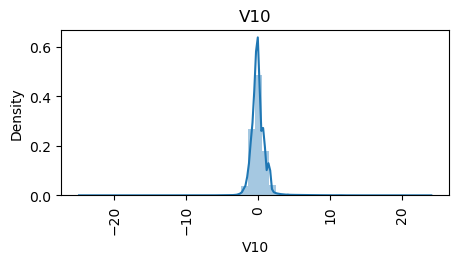

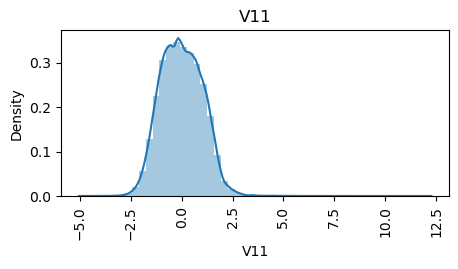

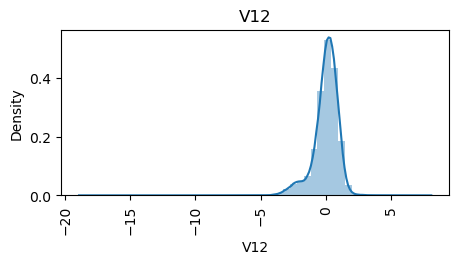

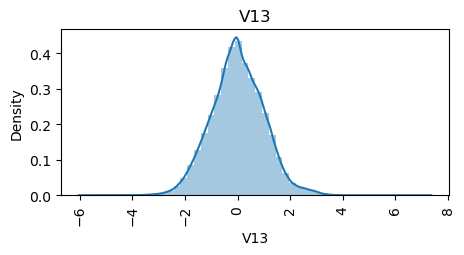

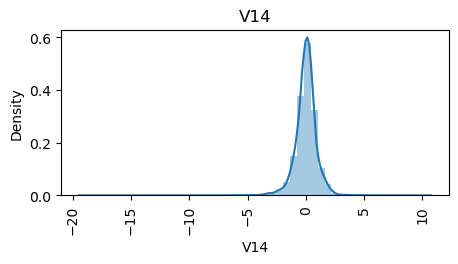

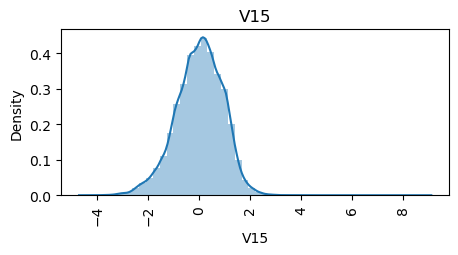

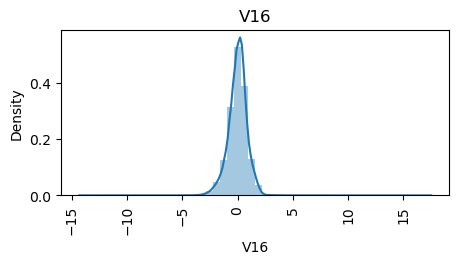

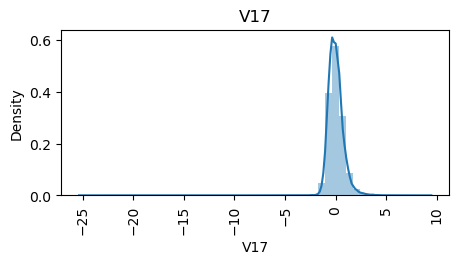

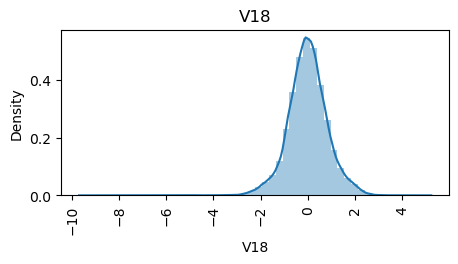

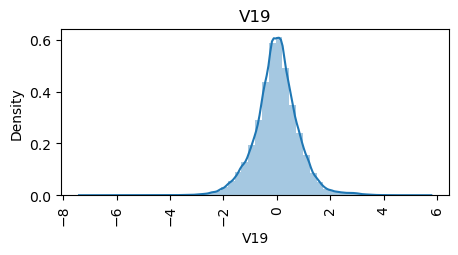

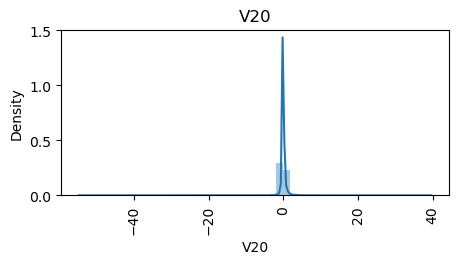

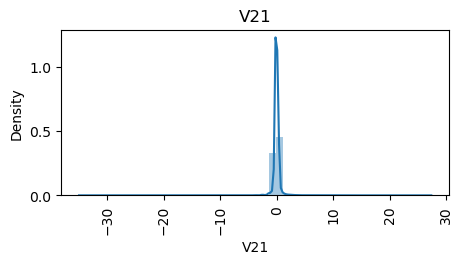

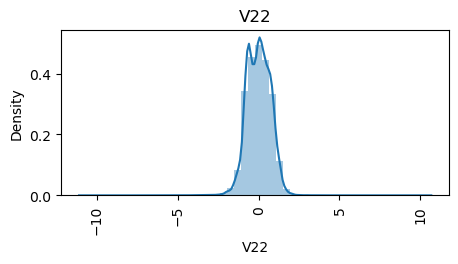

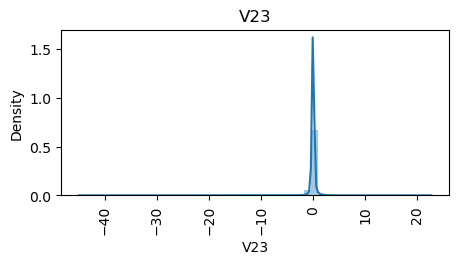

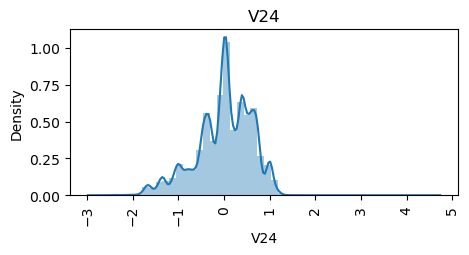

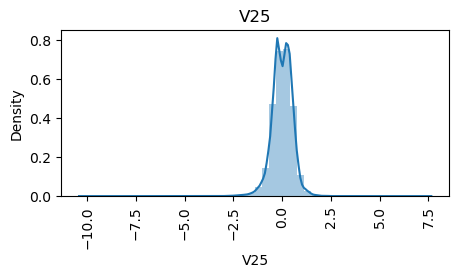

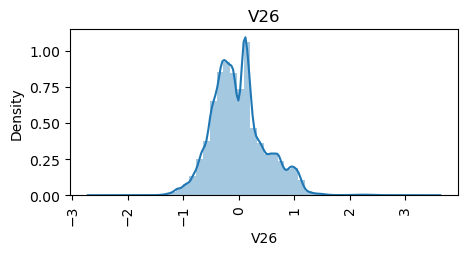

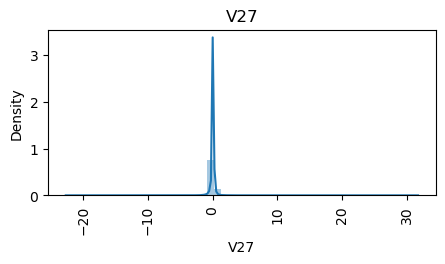

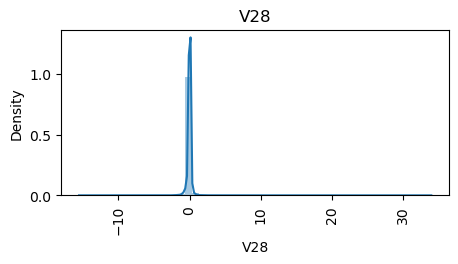

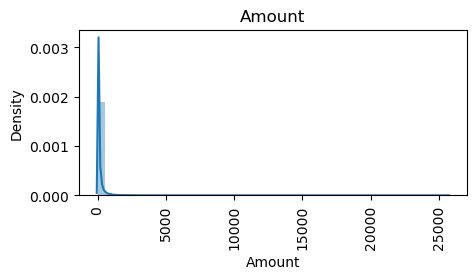

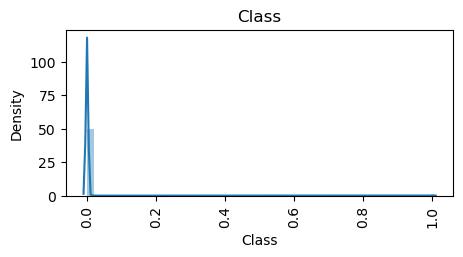

<Figure size 1700x2800 with 0 Axes>

In [62]:
cols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
       

# for plotting
rows = 11
columns = 3
iterator = 1


# iterator defines the plot area.

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    plt.figure(figsize=(17,28))
    
plt.tight_layout() 
plt.show()


In [66]:
!pip install pingouin

     -------------------------------------- 185.4/185.4 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196190 sha256=0104e79f7b2537fe3b03ab4c653ac168f9e34b5fc37dc8e25e054ab3ea4d33df
  Stored in directory: c:\users\lokavishruth\appdata\local\pip\cache\wheels\c0\9f\92\4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=0a28a141049447a9e715e4d2fc557a2bacfadb1977e5a114d8110a97a1e90054
  Stored in directory: c:\users\lokavishruth\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils


In [67]:
import pingouin as pg


In [68]:
pg.normality(df, dv=None, group=None, method='shapiro', alpha=0.05)

,W,pval,normal
Time,0.940307,0.000000e+00,False
V1,0.798998,0.000000e+00,False
V2,0.739716,0.000000e+00,False
V3,0.907989,0.000000e+00,False
V4,0.969280,0.000000e+00,False
V5,0.824880,0.000000e+00,False
V6,0.844864,0.000000e+00,False
V7,0.724865,0.000000e+00,False
V8,0.499426,0.000000e+00,False
V9,0.969345,0.000000e+00,False


In [70]:
from scipy import stats
stats.shapiro(df)

ShapiroResult(statistic=0.15488427877426147, pvalue=0.0)

In [71]:
df_norm = (df.apply(lambda x: pd.Series(stats.shapiro(x), index=['W','P'])).reset_index())
df_norm

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,W,0.940307,0.798998,0.739716,0.907989,0.96928,0.82488,0.844864,0.724865,0.499426,...,0.485626,0.982975,0.467238,0.971173,0.975001,0.978803,0.578655,0.438652,0.310061,0.017861
1,P,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 11. List down columns that are highly skewed.

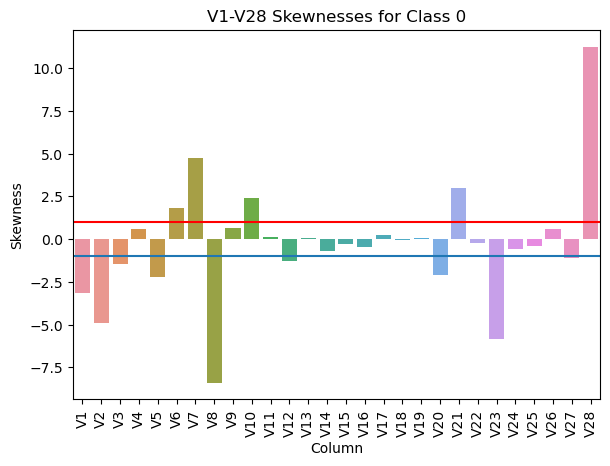

In [63]:
#Skewnesses for Class 0
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
c0 = df.loc[df['Class'] == 0]

plt.figure(figsize=(6.8, 4.8))
sns.barplot(x=col, y=c0[col].skew())
plt.axhline(y=1,color = 'r')
plt.axhline(y=-1)


plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 0')

plt.xticks(rotation = 90)
plt.show()

Highly skewed features for normal transaction: V1, V2, V3, V5, V6, V7, V8, V10, V12, V20,V21,V23,V28

In [ ]:
# Skewnesses for Class 1
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
c1 = df.loc[df['Class'] == 1]

plt.figure(figsize=(6.8,4.8))
sns.barplot(x=col, y=c1[col].skew())
plt.axhline(y=1,color = 'r')
plt.axhline(y=-1)

plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 1')

plt.xticks(rotation = 90)
plt.show()

If skewness is greater than +1,-1 considered as highly skewed
highly_skewed for fraud transcation = 'V1','V2','V3','V5','V7','V8','V10','V20','V21','V22','V23','V27'

In [ ]:
df.head(1)

#### 12. With the help of a standard scaler, normalize the respective column distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()


df["Normalize_Amount"] = ss.fit_transform(df["Amount"].values.reshape(-1, 1))
df['Normalise_time'] = ss.fit_transform(df['Time'].values.reshape(-1,1))



df.head()

#### 13. List down columns that have high kurtosis.

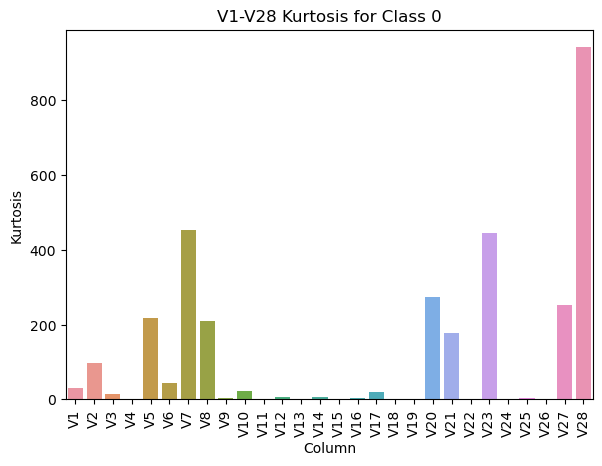

In [72]:
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
c0 = df.loc[df['Class'] == 0]

plt.figure(figsize=(6.8, 4.8))
sns.barplot(x=col, y=c0[col].kurtosis())


plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtosis for Class 0')

plt.xticks(rotation = 90)
plt.show()

In [ ]:
frauds.kurtosis()

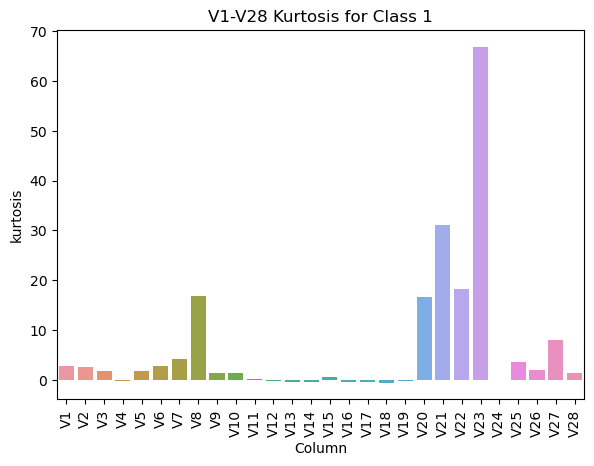

In [74]:
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
c0 = df.loc[df['Class'] == 1]

plt.figure(figsize=(6.8, 4.8))
sns.barplot(x=col, y=c0[col].kurtosis())


plt.xlabel('Column')
plt.ylabel('kurtosis')
plt.title('V1-V28 Kurtosis for Class 1')

plt.xticks(rotation = 90)
plt.show()

In [ ]:
normal.kurtosis()

#### 14. What is the distribution of Time and Amount columns in the dataset ?


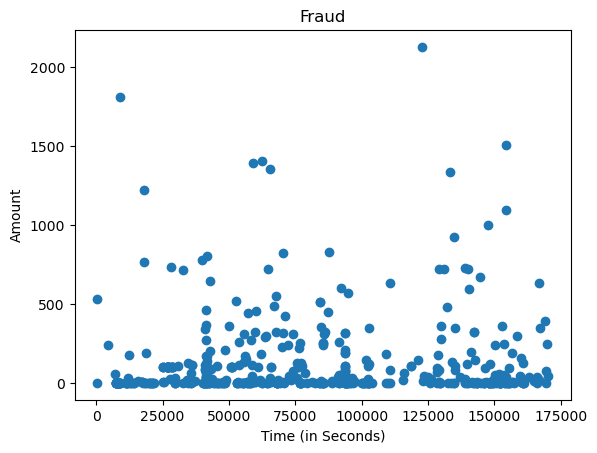

In [75]:
#distribution of Time and Amount columns for fraud transactions
plt.scatter(frauds.Time, frauds.Amount)
plt.title('Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

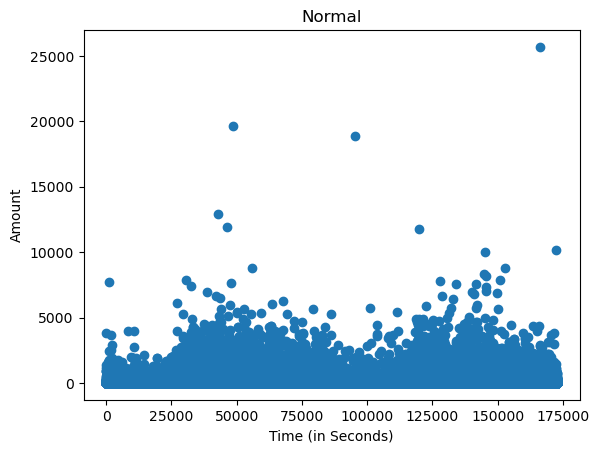

In [76]:
#distribution of Time and Amount columns for normal transactions
plt.scatter(normal.Time, normal.Amount)
plt.title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#### 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.

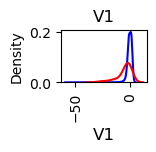

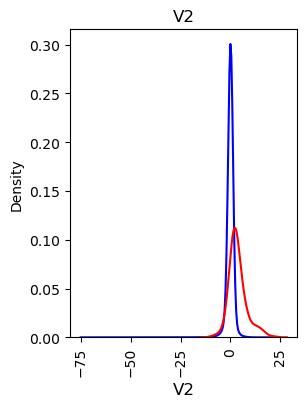

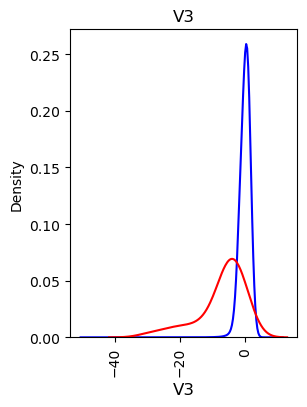

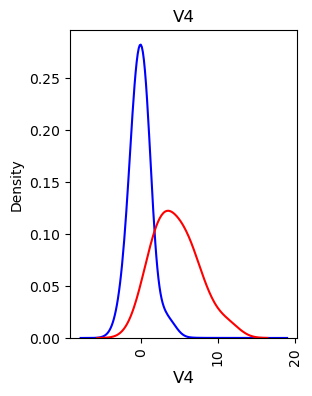

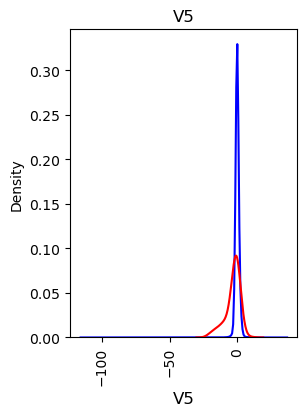

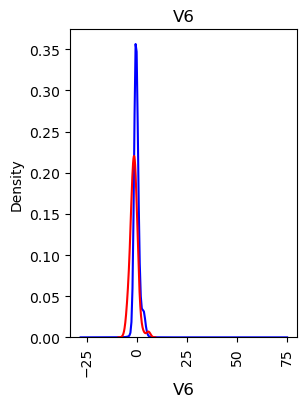

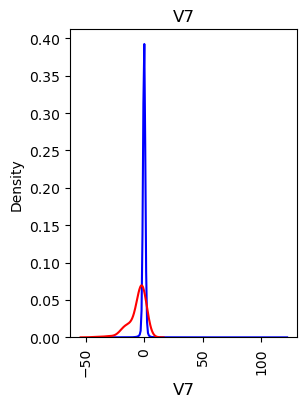

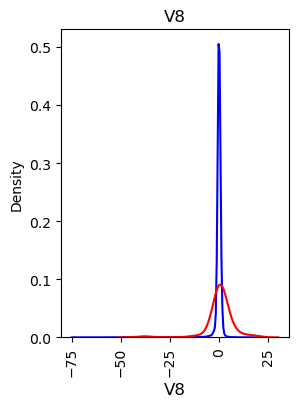

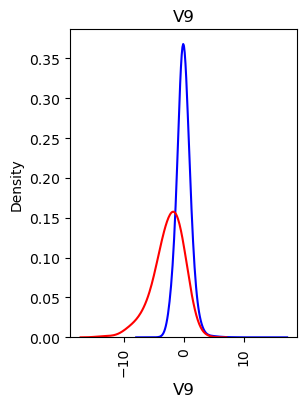

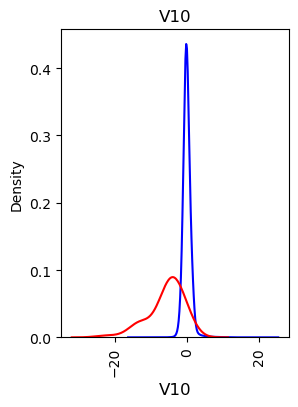

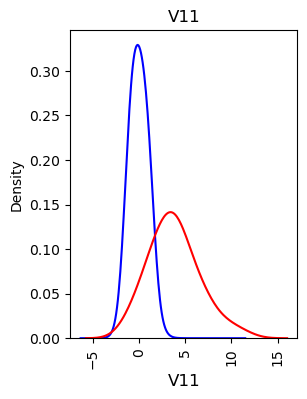

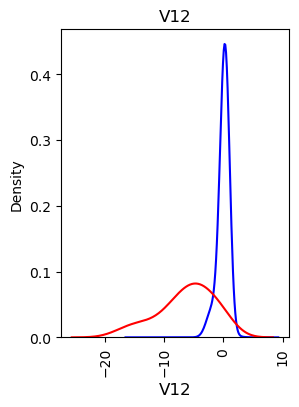

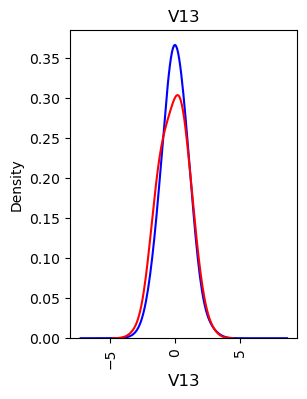

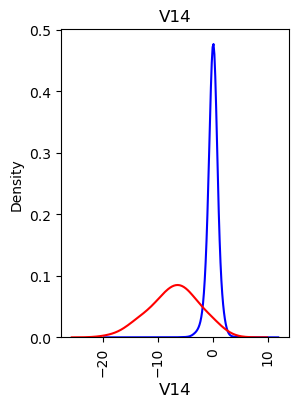

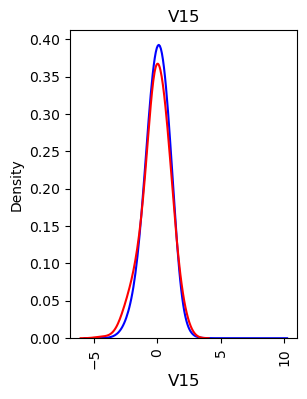

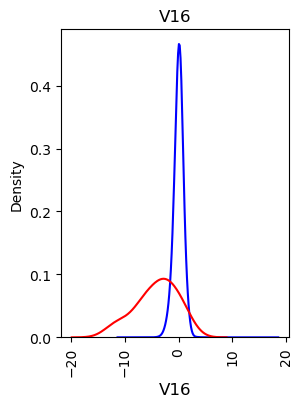

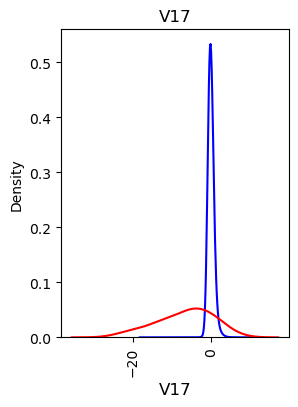

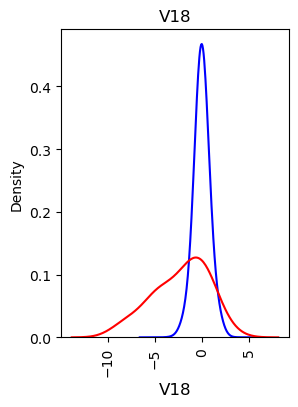

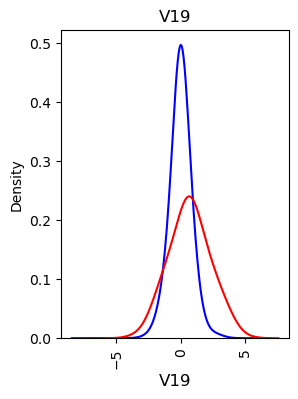

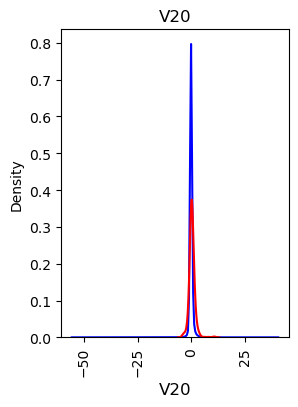

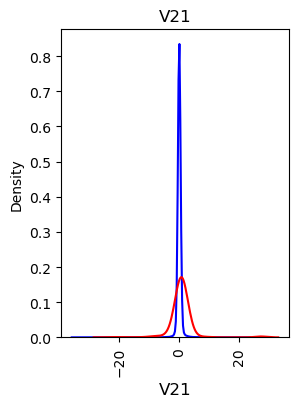

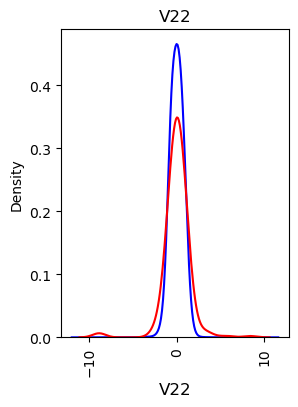

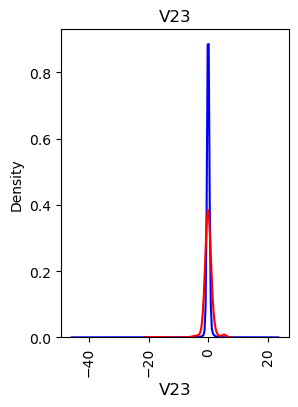

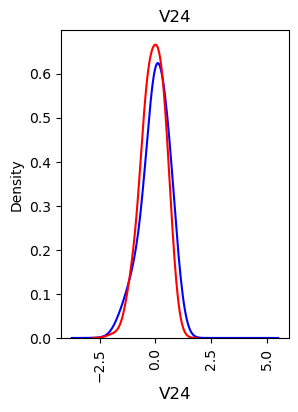

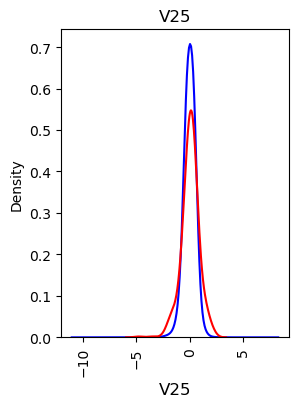

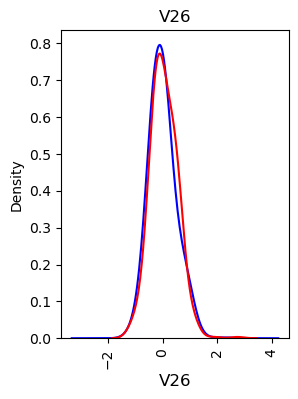

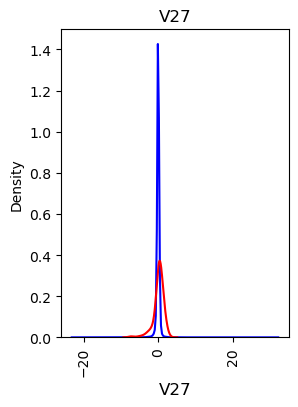

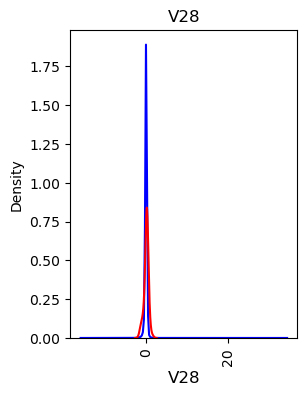

<Figure size 1700x2800 with 0 Axes>

In [77]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
rows = 6
columns = 5
iterator = 1

c0 = df.loc[df['Class'] == 0]
c1 = df.loc[df['Class'] == 1]

# iterator defines the plot area.

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.kdeplot(c0[i], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(c1[i], bw=0.5,label="Class = 1", color='r')
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    plt.xlabel(i, fontsize=12)
    plt.figure(figsize=(17,28))
    
plt.tight_layout() 

plt.show()


Observation:

V3, V4, V10, V11, V17,V19 have clearly separated distributions for Class values 0 and 1
V1, V2, V7, V9, V12, V14, V16, V18 have partially saperated distribution for Class 0 and 1
V13, V15, ,V20, V22-V28 have almost similar distribution for Class 0 and 1
V5, V6, V8, V21 have quite similar distribution for Class 0 and 1

#### 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

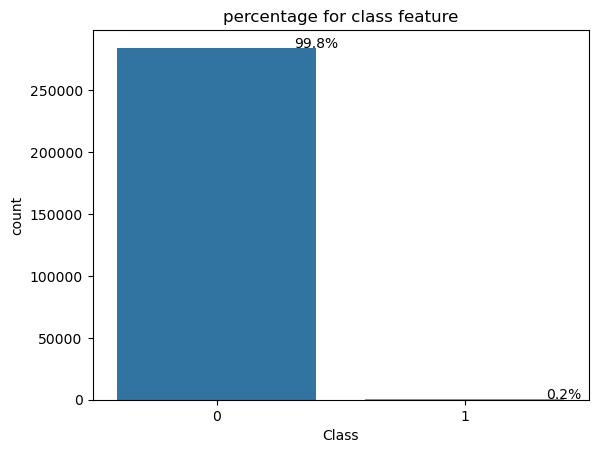

In [78]:
ax = sns.countplot(df.Class)
plt.title('percentage for class feature')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(28,28))
sns.heatmap(df.corr().round(2),annot = True,linewidths=.1,cmap='tab20b')
plt.show()

From the correlation matrix we interpret that V2 is highly -ve correlated with Amount

#### 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions?


Null Hypothesis(H0): Fraudulent transactions(1) are of similar or higher value as normal transactions(0)

    H0: muF <= muNF


Alternative Hypothesis(Ha) : Fraudulent transactions(1) are of lower value as normal transactions(0)


    Ha: muF > muNF

In [ ]:
mean_fraud= frauds['Amount'].mean()
mean_normal= normal['Amount'].mean()

fraudulent transation are 492, it is large sample, can perform Z - distribution, Z score

In [ ]:
z_val = np.abs(round(stats.norm.isf(q = 0.01), 2))

print('Critical value for one-tailed Z-test:', z_val)

In [ ]:
samp_mean = mean_fraud-mean_normal

# calculate the test statistic using the function 'z_test'
z_score = samp_mean /np.sqrt((frauds['Amount'].var()/frauds.shape[0]) + (normal['Amount'].var()/normal.shape[0]))
print("Z-score:", z_score)

In [ ]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= z_score)
p_value = stats.norm.sf(z_score)

p_value

since p_value is less than 0.01 we reject null hypothesis 

#### 19. Perform ANOVA test for Statistical feature selection.

In [ ]:
df['Class'].unique()

In [ ]:
# fraud transcation amount
fraud = df[df['Class'] == 1]['Amount']
# normal transcation amount
normal = df[df['Class'] == 0]['Amount']

In [ ]:
# perform Shapiro-Wilk test to test the normality

stat, p_value = stats.shapiro(df['Amount'])

# print the p-value
print('p-value:', p_value)

In [ ]:
# perform Levene's test for the equality of variances 

stat, p_value = stats.levene(fraud,normal)

# print the p-value 
print('P-Value:', p_value)

In [ ]:
t = df['Class'].nunique()
print('t:', t)


N = df['Class'].value_counts().sum()
print('N:', N)

For ⍺ = 0.05 and degrees of freedom (= t-1, N-t) = (1, 284805), calculate the critical value.

In [ ]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 1, dfd = 284805), 1))

print('Critical value for F-test:', f)

In [64]:
import statsmodels.stats.multicomp as mc
y=[]
for i in df.columns:
    mod = mc.MultiComparison(data=df[i],groups=df['Class'])
    posthoc = mod.tukeyhsd()
    print(i)
    print(posthoc.summary())
    print('_____________________________x_____________________________')

Time
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
     0      1 -14091.3953   0.0 -18290.8605 -9891.9302   True
-------------------------------------------------------------
_____________________________x_____________________________
V1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -4.7802   0.0 -4.9525 -4.6079   True
---------------------------------------------------
_____________________________x_____________________________
V2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     3.63   0.0 3.4846 3.7755   True
-------------------------------------------------
_____________________________x_________________

V24
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1053 0.0001 -0.1589 -0.0518   True
----------------------------------------------------
_____________________________x_____________________________
V25
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0415 0.0775 -0.0046 0.0876  False
---------------------------------------------------
_____________________________x_____________________________
V26
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0517 0.0174 0.0091 0.0944   True
--------------------------------------------------
_____________________________x_____________________________
V27
Multiple Comparison of 

mean in  V22, V23, V25 between class 0 and 1 are not significant

#### 20. Split the dataset randomly into train and test datasets. Use a train -test ratio of 70:30 ratio.

In [ ]:
y = df["Class"]
X = df.drop(["Class"], axis= 1)


from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(X, y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

print("Shape of train_y: ", train_y.shape)
print("Shape of test_y: ", test_y.shape)